<a href="https://colab.research.google.com/github/Sockcave/GGWP/blob/main/PlayerProfilesMark1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Player Profiles**#
* Creating profiles/categories for players based on their toxicity level.

* Traits of categories: Who was toxic first? Who was toxic only in return?

In [256]:
pip install boto3

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import re

##**Loading the data with the cleaned labels**##

In [260]:
data = pd.read_csv('dota_cleaned_labels.csv')

In [261]:
data.head()

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate
0,0,9,1808.40822,100%,0,0,0,0,0
1,2,6,1238.43090,carry,0,0,0,0,0
2,2,0,1248.42850,yes dog,0,0,0,0,0
3,2,0,1559.05260,yeah,0,0,0,0,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0


##**Quick EDA of Labels**##
* Quick look into the type of text messages under each label.

In [262]:
data

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate
0,0,9,1808.40822,100%,0,0,0,0,0
1,2,6,1238.43090,carry,0,0,0,0,0
2,2,0,1248.42850,yes dog,0,0,0,0,0
3,2,0,1559.05260,yeah,0,0,0,0,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6914908,999998,8,917.21927,damn you!!!!,1,1,0,0,0
6914909,999998,6,1709.49237,baited,0,0,0,0,0
6914910,999998,7,1765.54537,lmao,0,0,0,0,0
6914911,999999,0,974.04976,sec please,0,0,0,0,0


In [263]:
# Pertains to comments with mentions of race, religion, sexuality, etc.
data['identity_hate'].unique()

array([0, 1])

In [264]:
data[['text', 'identity_hate']][data['identity_hate'] == 1]

,text,identity_hate
519,miss me with that gay shit,1
917,fat nigga,1
936,or do you want gay porn,1
1132,Big nigga tree hrs,1
1314,Faggots,1
...,...,...
6912141,u all fuck u stupid faggots,1
6912521,yah fucking gay ass shit,1
6913833,ice tray on a nigga flooded,1
6914634,those faggots,1


In [265]:
# Playground insults
data['insult'].unique()

array([0, 1])

In [266]:
data[['text', 'insult']][data['insult'] == 1]

,text,insult
27,STUPID!,1
93,bastard party,1
119,WELL PLAYED SHIT CUNTS,1
139,CAUSE FO FUCKING HG,1
154,fuck off lol,1
...,...,...
6914804,end fast idiot three in team,1
6914806,stupid idiot indog,1
6914808,cancer dog shit indon idiot 3,1
6914817,fuck up,1


In [267]:
# Comments labeled as toxic
data['toxic'].unique()

array([0, 1])

In [268]:
data[['text', 'toxic']][data['toxic'] == 1]

,text,toxic
16,so ya mama likes dick ehh?,1
18,fucking reported axe,1
26,STUPIDD PIUDGE,1
27,STUPID!,1
92,fuckkk youuuuu,1
...,...,...
6914817,fuck up,1
6914871,by spamming this broken op shit,1
6914899,Fuck this,1
6914903,Shut the fuck up russian cunt,1


In [269]:
# Comments labeled as threats (death threats, DDOS threats, doxing)
data['threat'].unique()

array([0, 1])

In [270]:
data[['text', 'threat']][data['threat'] == 1]

,text,threat
4519,go fucking kill him,1
5251,U WIWL DIE,1
5674,kill kill?,1
6394,I won0't kill you,1
7960,you kill top[,1
...,...,...
6898744,and kill all,1
6906588,i kill your parents,1
6906668,kill yourselff,1
6908253,i wanna kill you,1


In [271]:
# Comments labeled as inappropriate (profanity)
data['obscene'].unique()

array([0, 1])

In [272]:
data[['text', 'obscene']][data['obscene'] == 1]

,text,obscene
10,wtf,1
16,so ya mama likes dick ehh?,1
18,fucking reported axe,1
27,STUPID!,1
41,wtf,1
...,...,...
6914862,wtf,1
6914871,by spamming this broken op shit,1
6914899,Fuck this,1
6914903,Shut the fuck up russian cunt,1


##**Mark 1 of Player Profiles**##
* Creating a "psuedo" profiler, by simply creating a column of player profiles.
* Each label is either a 0 or 1. Can try adding up the columns. 
* Lowest possible sum is 0, meaning they do not checkmark any of the toxicity labels.
* Highest possible sum is 5, meaning all labels are checkmarked.

In [273]:
data2 = data.copy(deep=True)
data2.head()

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate
0,0,9,1808.40822,100%,0,0,0,0,0
1,2,6,1238.43090,carry,0,0,0,0,0
2,2,0,1248.42850,yes dog,0,0,0,0,0
3,2,0,1559.05260,yeah,0,0,0,0,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0


In [274]:
data2['total_score'] = data2['toxic'] + data2['obscene'] + data2['threat'] + data2['insult'] + data2['identity_hate']

In [275]:
data2

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score
0,0,9,1808.40822,100%,0,0,0,0,0,0
1,2,6,1238.43090,carry,0,0,0,0,0,0
2,2,0,1248.42850,yes dog,0,0,0,0,0,0
3,2,0,1559.05260,yeah,0,0,0,0,0,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6914908,999998,8,917.21927,damn you!!!!,1,1,0,0,0,2
6914909,999998,6,1709.49237,baited,0,0,0,0,0,0
6914910,999998,7,1765.54537,lmao,0,0,0,0,0,0
6914911,999999,0,974.04976,sec please,0,0,0,0,0,0


In [276]:
data2['total_score'].unique()

array([0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Distribution of Time')

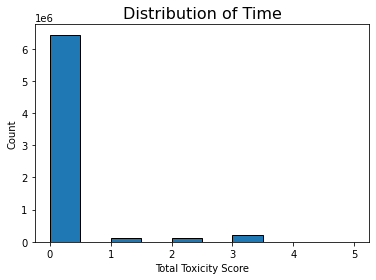

In [277]:
# Most players aren't that toxic as we can seen in the following histogram, if we are looking at total toxicity scores.
plt.hist(data2['total_score'], ec = 'black')
plt.xlabel('Total Toxicity Score')
plt.ylabel('Count')
plt.title('Distribution of Time', fontsize = 16)

Using a weighted average toxicity score

In [278]:
data2['avg'] = (data2['toxic'] + data2['obscene'] + data2['threat'] + data2['insult'] + data2['identity_hate'])/5

In [279]:
data2

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg
0,0,9,1808.40822,100%,0,0,0,0,0,0,0.0
1,2,6,1238.43090,carry,0,0,0,0,0,0,0.0
2,2,0,1248.42850,yes dog,0,0,0,0,0,0,0.0
3,2,0,1559.05260,yeah,0,0,0,0,0,0,0.0
4,2,0,1563.18490,fast and furious,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6914908,999998,8,917.21927,damn you!!!!,1,1,0,0,0,2,0.4
6914909,999998,6,1709.49237,baited,0,0,0,0,0,0,0.0
6914910,999998,7,1765.54537,lmao,0,0,0,0,0,0,0.0
6914911,999999,0,974.04976,sec please,0,0,0,0,0,0,0.0


In [280]:
data2['avg'].unique()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Text(0.5, 1.0, 'Distribution of Time')

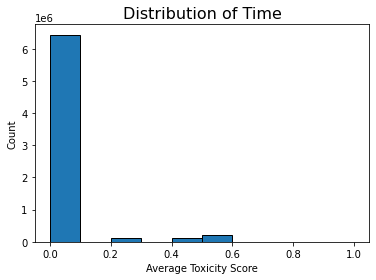

In [281]:
# Most players aren't that toxic as we can seen in the following histogram, if we are looking at total toxicity scores.
plt.hist(data2['avg'], ec = 'black')
plt.xlabel('Average Toxicity Score')
plt.ylabel('Count')
plt.title('Distribution of Time', fontsize = 16)

In [282]:
data2.groupby(['match', 'slot']).first()

time                 text  ...  total_score  avg
match  slot                                   ...                  
0      9     1808.40822                 100%  ...            0  0.0
2      0     1248.42850              yes dog  ...            0  0.0
       2     2009.43790           we too pro  ...            0  0.0
       6     1238.43090                carry  ...            0  0.0
3      3     2212.78120    vac d o l b a e b  ...            0  0.0
...                 ...                  ...  ...          ...  ...
999998 6     1709.49237               baited  ...            0  0.0
       7       59.56197  hes not coming back  ...            0  0.0
       8      917.21927         damn you!!!!  ...            2  0.4
999999 0      974.04976           sec please  ...            0  0.0
       3     2674.38856             ggwp lol  ...            0  0.0

[2326491 rows x 9 columns]

##**Severity of each Toxic Label**##
* Weights need to be adjusted for each toxicity label.
* A message classified as a threat is more severe than one classified as an insult.
* Survey created and sent to some gaming community servers in order to gauge moderator priority preferences. (What gamers believe are the most important types of game chat data that moderators should divert their attention to.)
* For each label, we calculate the percentage of votes for every number between 1 to 5.
> For example, for chats labeled in the category "identity_hate", 34.6% of respondents voted 5 (believing it should be given the highest of priority from moderators.

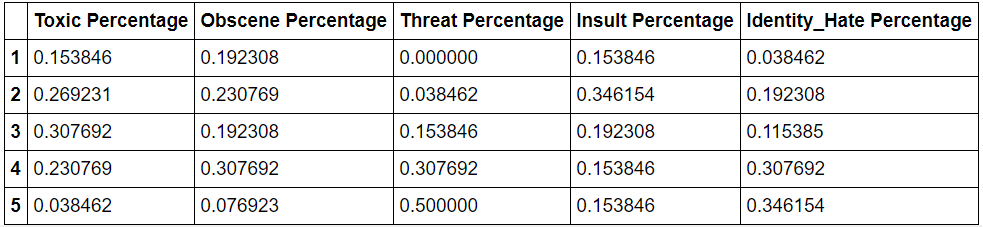

In [283]:
mod_data = pd.read_csv('percent_data.csv')
mod_data = mod_data.iloc[:, 1:6]
mod_data = mod_data.rename({0:1, 1:2, 2:3, 3:4, 4:5}, axis='index')
mod_data

,Toxic Percentage,Obscene Percentage,Threat Percentage,Insult Percentage,Identity_Hate Percentage
1,0.153846,0.192308,0.000000,0.153846,0.038462
2,0.269231,0.230769,0.038462,0.346154,0.192308
3,0.307692,0.192308,0.153846,0.192308,0.115385
4,0.230769,0.307692,0.307692,0.153846,0.307692
5,0.038462,0.076923,0.500000,0.153846,0.346154


In [284]:
mod_data['Toxic Percentage'][5]

0.038461538461538464

In [285]:
five_labels = data2[data2['avg'] == 1]
five_labels

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg
4277216,618580,2,2948.58118,I HOPE YOU ALL FUCKING GAY RUSSIAN SUCKER DIE ...,1,1,1,1,1,5,1.0
4304067,622513,5,-54.48670,ok i will rape you fucking faggot,1,1,1,1,1,5,1.0
4610883,666865,3,947.70190,HOPE U DIE TO EBOLA U FUCKING FAGGOTS,1,1,1,1,1,5,1.0
5114798,738771,0,1325.18606,i kill you nigga,1,1,1,1,1,5,1.0
5452593,786925,2,394.17045,techies you are a mother fucking bitch and i h...,1,1,1,1,1,5,1.0


In [286]:
len(five_labels)

5

In [287]:
five_labels.iloc[2, :]

match                                           666865
slot                                                 3
time                                           947.702
text             HOPE U DIE TO EBOLA U FUCKING FAGGOTS
toxic                                                1
obscene                                              1
threat                                               1
insult                                               1
identity_hate                                        1
total_score                                          5
avg                                                  1
Name: 4610883, dtype: object

In [288]:
five_labels.iloc[2, :]['avg']

1.0

In [289]:
five_labels.iloc[2, :]['toxic'] ==1 

True

In [290]:
#An indicator function
def low_upper(lower_arg, upper_arg):
  if lower_arg >= upper_arg:
    return'low'
  else:
    return 'high'

In [291]:
def is_toxic(row):
  toxic = (row['toxic'] == 1)
  lower = mod_data['Toxic Percentage'][1] + mod_data['Toxic Percentage'][2] + mod_data['Toxic Percentage'][3]
  upper = mod_data['Toxic Percentage'][3] + mod_data['Toxic Percentage'][4] + mod_data['Toxic Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if toxic:
    print('\nThis player\'s chat message is potentially toxic.')
    print('\n ' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.')
  else:
    print('\nNot being toxic.')
def toxic_ind(row):
  toxic = (row['toxic'] == 1)
  if toxic:
    return True
  else:
    return False

In [292]:
is_toxic(five_labels.iloc[0, :])


This player's chat message is potentially toxic.

 73.08% of players generally believe this is of low concern.


In [293]:
def is_obscene(row):
  obscene = (row['obscene'] == 1)
  lower = mod_data['Obscene Percentage'][1] + mod_data['Obscene Percentage'][2] + mod_data['Obscene Percentage'][3]
  upper = mod_data['Obscene Percentage'][3] + mod_data['Obscene Percentage'][4] + mod_data['Obscene Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if obscene:
    print('\nThis player\'s chat message is potentially obscene.')
    print('\n ' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.')
  else:
    print('\nNot being obscene.')

def obscene_ind(row):
  obscene = (row['obscene'] == 1)
  if obscene:
    return True
  else:
    return False

In [294]:
def is_threat(row):
  threat = (row['threat'] == 1)
  lower = mod_data['Threat Percentage'][1] + mod_data['Threat Percentage'][2] + mod_data['Threat Percentage'][3]
  upper = mod_data['Threat Percentage'][3] + mod_data['Threat Percentage'][4] + mod_data['Threat Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if threat:
    print('\nThis player\'s chat messages is potentially a threat.')
    print('\n ' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.')
  else:
    print('\nNot threatening.')
  
def threat_ind(row):
  threat = (row['threat'] == 1)
  if threat:
    return True
  else:
    return False

In [295]:
def is_insult(row):
  insult = (row['insult'] == 1)
  lower = mod_data['Insult Percentage'][1] + mod_data['Insult Percentage'][2] + mod_data['Insult Percentage'][3]
  upper = mod_data['Insult Percentage'][3] + mod_data['Insult Percentage'][4] + mod_data['Insult Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if insult:
    print('\nThis player\'s chat messages is an insult.')
    print('\n ' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.')
  else:
    print('\nNot being insulting.')

def insult_ind(row):
  insult = (row['insult'] == 1)
  if insult:
    return True
  else:
    return False

In [296]:
def is_identity_hate(row):
  identity_hate = (row['identity_hate'] == 1)
  lower = mod_data['Identity_Hate Percentage'][1] + mod_data['Identity_Hate Percentage'][2] + mod_data['Identity_Hate Percentage'][3]
  upper = mod_data['Identity_Hate Percentage'][3] + mod_data['Identity_Hate Percentage'][4] + mod_data['Identity_Hate Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if identity_hate:
    print('\nThis player\'s chat messages is potentially an attack on other\'s identities.')
    print('\n ' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.')
  else:
    print('\nNo indication of an identity attack.')

def identity_hate_ind(row):
  identity_hate = (row['identity_hate'] == 1)
  if identity_hate:
    return True
  else:
    return False

In [297]:
is_identity_hate(five_labels.iloc[2, :])


This player's chat messages is potentially an attack on other's identities.

 76.92% of players generally believe this is of high concern.


In [298]:
def profile_gen(data):
  for i in range(len(data)):
    id = data.iloc[:, 0].index[i]
    row = data.iloc[i, :]
    if row['avg'] == 0:
      print('\nPlayer ' +  str(id) + ' is a casual player. Their behavior has remained neutral.')
      print('\n')
      print('=' * 15)
    elif row['avg'] == 1:
      print('\nPlayer ' +  str(id) + ' is highly toxic. They are all around concerning. Their behavior has reached unacceptable proportions.')
      print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
      is_toxic(row)
      is_obscene(row)
      is_threat(row)
      is_insult(row)
      is_identity_hate(row)
      print('\n')
      print('=' * 15)
    elif row['avg'] == 0.4:
      if threat_ind(row) or identity_hate_ind(row):
        print('\nPlayer ' +  str(id) + ' is a toxic player with some highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 15)
      else: 
        print('\nPlayer ' +  str(id) + ' is a casual player with some slight toxic tendencies. Their behavior is nothing too serious.')
        print('\n')
        print('=' * 15)
    elif row['avg'] == 0.6:
      if threat_ind(row) or identity_hate_ind(row) or obscene_ind(row):
        print('\nPlayer ' +  str(id) + ' is a toxic player with some highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 15)
      else: 
        print('\nPlayer ' +  str(id) + ' is a casual player with some slight toxic tendencies. Their behavior may be of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        print('\n')
        print('=' * 15)
    else:
        print('\nPlayer ' +  str(id) + ' is a toxic player with highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 15)

In [299]:
profile_gen(five_labels)


Player 4277216 is highly toxic. They are all around concerning. Their behavior has reached unacceptable proportions.

The following moderated message: "I HOPE YOU ALL FUCKING GAY RUSSIAN SUCKER DIE ON AIDS". 
Moderators need to step in ASAP.


This player's chat message is potentially toxic.

 73.08% of players generally believe this is of low concern.

This player's chat message is potentially obscene.

 61.54% of players generally believe this is of low concern.

This player's chat messages is potentially a threat.

 96.15% of players generally believe this is of high concern.

This player's chat messages is an insult.

 69.23% of players generally believe this is of low concern.

This player's chat messages is potentially an attack on other's identities.

 76.92% of players generally believe this is of high concern.



Player 4304067 is highly toxic. They are all around concerning. Their behavior has reached unacceptable proportions.

The following moderated message: "ok i will rap

In [300]:
#Testing on random sample of 50 players
profile_gen(data2.sample(50))


Player 985864 is a casual player. Their behavior has remained neutral.



Player 2453434 is a casual player. Their behavior has remained neutral.



Player 6018068 is a casual player. Their behavior has remained neutral.



Player 1993749 is a casual player. Their behavior has remained neutral.



Player 4631352 is a casual player. Their behavior has remained neutral.



Player 345296 is a casual player. Their behavior has remained neutral.



Player 5247448 is a casual player. Their behavior has remained neutral.



Player 6260270 is a casual player. Their behavior has remained neutral.



Player 504096 is a casual player. Their behavior has remained neutral.



Player 211306 is a casual player. Their behavior has remained neutral.



Player 3308425 is a casual player. Their behavior has remained neutral.



Player 3263905 is a casual player. Their behavior has remained neutral.



Player 2284729 is a casual player. Their behavior has remained neutral.



Player 3923149 is a casual p

In [301]:
profile_gen(data2.tail(200))


Player 6914713 is a casual player. Their behavior has remained neutral.



Player 6914714 is a casual player. Their behavior has remained neutral.



Player 6914715 is a casual player. Their behavior has remained neutral.



Player 6914716 is a casual player. Their behavior has remained neutral.



Player 6914717 is a casual player. Their behavior has remained neutral.



Player 6914718 is a casual player. Their behavior has remained neutral.



Player 6914719 is a casual player. Their behavior has remained neutral.



Player 6914720 is a casual player. Their behavior has remained neutral.



Player 6914721 is a casual player. Their behavior has remained neutral.



Player 6914722 is a casual player. Their behavior has remained neutral.



Player 6914723 is a casual player. Their behavior has remained neutral.



Player 6914724 is a casual player. Their behavior has remained neutral.



Player 6914725 is a casual player. Their behavior has remained neutral.



Player 6914726 is a casu

In [302]:
data2.tail(200)

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg
6914713,999966,7,1595.07718,press f9 to win,0,0,0,0,0,0,0.0
6914714,999966,1,1655.92898,lol,0,0,0,0,0,0,0.0
6914715,999966,2,1736.26858,commend me,0,0,0,0,0,0,0.0
6914716,999967,5,-65.71403,that russians!,0,0,0,0,0,0,0.0
6914717,999967,9,-65.71403,is khakui ai dhurugnhul,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6914908,999998,8,917.21927,damn you!!!!,1,1,0,0,0,2,0.4
6914909,999998,6,1709.49237,baited,0,0,0,0,0,0,0.0
6914910,999998,7,1765.54537,lmao,0,0,0,0,0,0,0.0
6914911,999999,0,974.04976,sec please,0,0,0,0,0,0,0.0
